# CREDIT CARD FRAUD DETECTION

The main reason for analyzing this dataset is to get a trained model that can detect whether a transaction is a fraud or not. To do so, I am going to explore the dataset and see which model could be the best to complete the task.

## EDA

In [140]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('creditcard.csv')
data.info()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Once we look at the DataFrame, we can notice that:
- each column starting with a capital V has unique values for each row. Besides the STD of every column is not great; 
- Time repeats values almost every 2 rows;
- There are 32767 different values of amounts within the 'amount' column;
- Finally, the column labeled 'Class' has the important information as it classifies 'healthy' accounts (and is described with a 0) and fraudulent accounts (is described with a 1).

In [5]:
frauds = data[data['Class'] > 0]
healthy = data[data['Class'] == 0]

I proceed to partition the DataFrame "data", to create two DataFrames. One of them consists of saving all the rows where the column class is equal to 1 (those are cataloged as "fraud") which will be named as "Fraud", while the "healthy" movements DF will save the rows where the column "Class" is equal to zero.

In [17]:
frauds.shape, healthy.shape

((492, 31), (284315, 31))

apparentely, the amount of frauds are only near of the %17 of the total amount of rows.

In [134]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
mpl.style.use('bmh')

In [90]:
# Let's sum all the values of the Vn columns of each DF that we particioned previously and get de mean of each one
healthy_values = healthy.loc[:,~healthy.columns.isin(['Time','Amount','Class'])]
fraud_values = frauds.loc[:,~frauds.columns.isin(['Time','Amount','Class'])]

print("mean of healthy values " + str(healthy_values.sum(axis = 'columns').mean()))
print("mean of fraud values " + str(fraud_values.sum(axis = 'columns').mean()))

mean of healthy values 0.07294863038342761
mean of fraud values -42.15526391759122


In [63]:
healthy_values.shape, fraud_values.shape

((284315, 28), (492, 28))

In [81]:
healthy_values.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000
mean,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131
std,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,...,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,...,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084
25%,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,...,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950
50%,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,...,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199
75%,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,...,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962
max,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,...,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808


In [82]:
fraud_values.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667
std,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,...,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291
min,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290
25%,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,...,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868
50%,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,...,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344
75%,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,...,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152
max,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,...,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364


We can see in the description of both of the DF's that the mean and STD are very different in each one of them.

In [98]:
# Let's see the difference between them
healthy_values.V1.sum(), fraud_values.V1.sum(), data.V1.sum()

(2347.7986332080377, -2347.7986332077085, 3.327613740111701e-10)

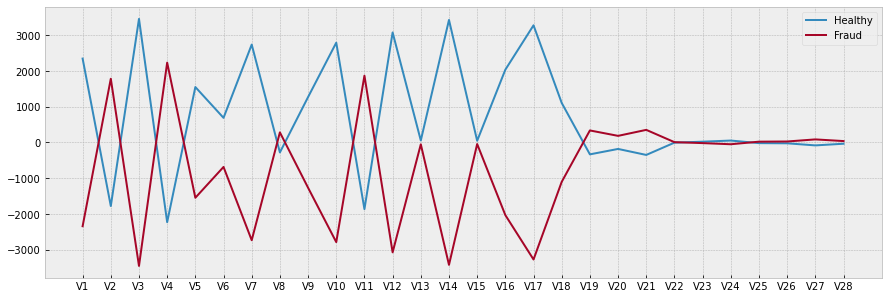

In [114]:
# Plotting the summed values of each DF

plt.figure(figsize = (15,5))
plt.plot(list(range(0,28)), healthy_values.sum(), fraud_values.sum())
#plt.title('Summed columns of Healthy and Fraud movements')
plt.legend(['Healthy', 'Fraud'])
plt.show()

As we can see in the figure above, the behavior between the sum of "healthy" movements are almost opposite to the "Fraudulent" ones, since the difference between both is very small.

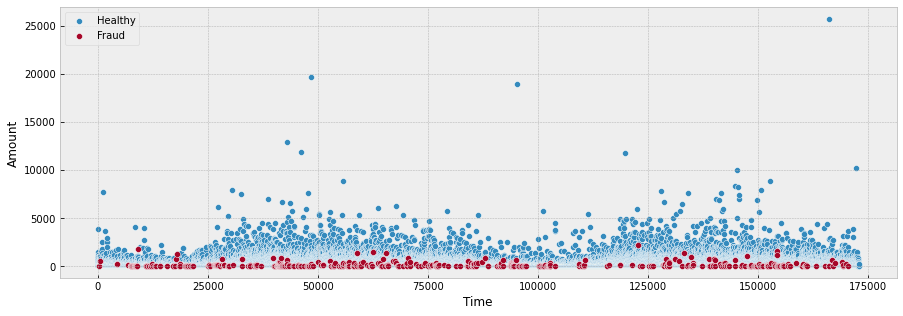

In [125]:
# Amounts through "Time"
plt.figure(figsize = (15,5))
sns.scatterplot(data = healthy, x = "Time", y = "Amount")
sns.scatterplot(data = frauds, x = "Time", y = "Amount")

plt.legend(['Healthy', 'Fraud'])

In this graph we can notice that the red dots tells us that the amounts of the fraudulents transactions are not bigger than those of healthy ones.

<AxesSubplot:ylabel='Amount'>

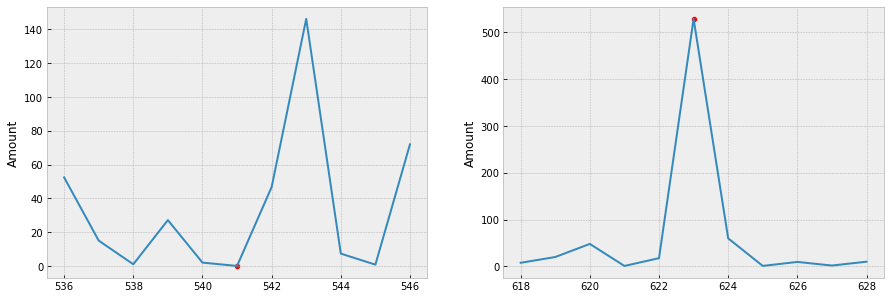

In [139]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.lineplot(data = data[536:547], x = list(range(536,547)), y = "Amount")
sns.scatterplot(data = data.loc[541], x = range(541,542), y = "Amount", color = 'r')

plt.subplot(1,2,2)
sns.lineplot(data = data[618:629], x = list(range(618,629)), y = "Amount")
sns.scatterplot(data = data.loc[623], x = range(623,624), y = "Amount", color = 'r')

In this new figure the red dots in upon the line signify a fraudulent transaction amount. As we can see, the red dots appear at the minimum and maximum of a line, but they doesn't follow an exact pattern.

# MODELLING

Here we have a qualitative data set, due to the "Class" column that indicates whether a completed transaction is a fraud or not. Therefore, the best models to complete the main task are the algorithms that are used to classify. I will take the K-Nearest-Neighbors (K-Neighbors-Classifier) and Random Forest Machine Learning models for this case.

In [166]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [142]:
X = data.loc[:,~data.columns.isin(['Class'])]
y = data['Class']

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [149]:
modelo_KNN = KNeighborsClassifier()
modelo_RF = RandomForestClassifier()

In [150]:
modelo_KNN.fit(X_train, y_train)
modelo_RF.fit(X_train, y_train)

RandomForestClassifier()

In [151]:
preds_KNN = modelo_KNN.predict(X_test)
preds_RF = modelo_RF.predict(X_test)

# KNN

<Figure size 720x432 with 0 Axes>

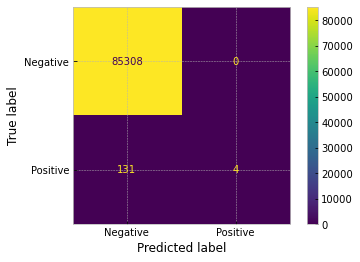

In [152]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo_KNN, X_test, y_test, display_labels=['Negative', 'Positive'])

In [153]:
confusion = metrics.confusion_matrix(y_test, preds_KNN)
confusion.ravel()

array([85308,     0,   131,     4], dtype=int64)

In [154]:
accuracy = metrics.accuracy_score(y_test, preds_KNN)
accuracy 

0.9984668141333989

In [155]:
print(metrics.classification_report(y_test, preds_KNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       1.00      0.03      0.06       135

    accuracy                           1.00     85443
   macro avg       1.00      0.51      0.53     85443
weighted avg       1.00      1.00      1.00     85443



# Random Forest

<Figure size 720x432 with 0 Axes>

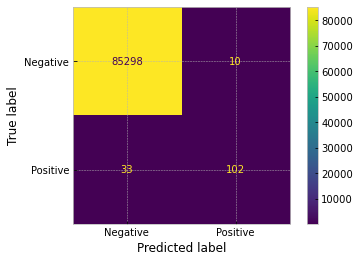

In [156]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo_RF, X_test, y_test, display_labels=['Negative', 'Positive'])

In [157]:
confusion = metrics.confusion_matrix(y_test, preds_RF)
confusion.ravel()

array([85298,    10,    33,   102], dtype=int64)

In [158]:
accuracy = metrics.accuracy_score(y_test, preds_RF)
accuracy 

0.9994967405170698

In [178]:
modelo_RF.score(X_test,y_test)

0.9994967405170698

In [159]:
print(metrics.classification_report(y_test, preds_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.76      0.83       135

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Apparently, the model Random Forest got the best performance compared to KNN. Thus, the bank should use this model in order to get the same a accuracy with other random transactions, even if it appears to be over-fitted.

<Figure size 1080x360 with 0 Axes>

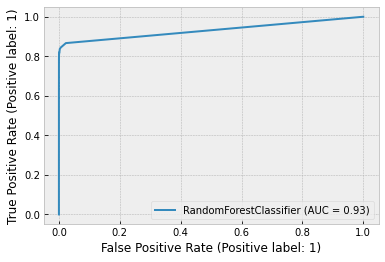

In [165]:
plt.figure(figsize = (15,5))
metrics.plot_roc_curve(modelo_RF,X_test,y_test)

Even if the AUC of the ROC curve is equal to 0.93, we can do it better. Then, we do a last final training, but adding a dimension in the model parameters:
- n_jobs: "The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors."
- max_depth: "The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples."
- random_state: "Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features)."

In [170]:
model=RandomForestClassifier(n_jobs=-1, max_depth=14, random_state=17)
model.fit(X_train,y_train)
y_preds=model.predict(X_test)

In [177]:
accuracy = metrics.accuracy_score(y_test, preds_RF)
accuracy 

0.9994967405170698

In [171]:
model.score(X_test,y_test)

0.9994616293903538

In [172]:
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.89      0.75      0.81       135

    accuracy                           1.00     85443
   macro avg       0.95      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



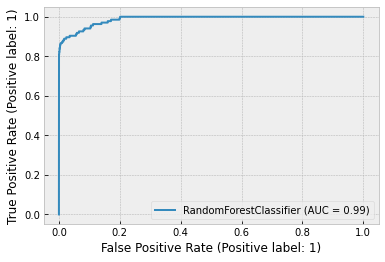

In [174]:
metrics.plot_roc_curve(model,X_test,y_test)

# Conclusion

We added robustness to our model. Random Forest was able to classify with a high accuracy, now the bank should be able to have a better prediction to analyze wether a transaction results in fraud or not.